In [1]:
import numpy as np
import torch
import re, copy, os, chardet, time
from torch import nn
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,confusion_matrix,matthews_corrcoef 
from sklearn import metrics
from scipy import stats
import pickle
import shutil
import dataProcess
import pandas as pd
from DSpaLaRefinerModelDiscWPos import *
import matplotlib.pyplot as plt
from matplotlib import font_manager
import torch.nn.functional as F
import random
font_path = font_manager.findfont(font_manager.FontProperties(family='Arial'))
plt.rcParams["font.family"] = "Arial"

seed_value = 48
random.seed (seed_value)
# Set seed for NumPy
np.random.seed(seed_value)
# Set seed for PyTorch
torch.manual_seed(seed_value)
# If you are using CUDA
torch.cuda.manual_seed_all(seed_value)


In [2]:
dataPath = './SplitData/data_hospital_11_0.pt'   
device ='cpu'
feature_names = pd.read_csv(r'C:\LvXiang\Work\Work1\CodeReconstrut\Code_management\feature_name.csv',nrows=0).columns[1:].tolist()

In [3]:
featureSort = []
for i in range(100):
    if i%10 ==0 :
        print(i)
    OutPath = './out_11_6516Repeat%s'%i
    with open(OutPath+os.sep+'paraDict.pt', 'rb') as FOUT:
        paraDict = pickle.load(FOUT)
    model_pre = WrappedModel(**paraDict).float().to(device)
    model_pre.load_state_dict(torch.load(OutPath+os.sep+'bestStateDict.pt'))
    df_sum_WDD_w_all_sort = weight_analysis(model_pre,2,feature_name =feature_names ,com_mod=None,acc_filter_discW = 0.9999,outSavePath='./')
    plt.close()
    featureSort.append(df_sum_WDD_w_all_sort.index.tolist())

0
10
20
30
40
50
60
70
80
90


In [4]:
topNum=12
top_k_list = []
for i in featureSort:
    top_k_list.append(i[-topNum:])

In [5]:
from collections import Counter
flattened_list = [item for sublist in top_k_list for item in sublist]
element_count = Counter(flattened_list)
sorted_element_count = sorted(element_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_element_count)

[('HCT', 100), ('GLU-Urine', 100), ('age', 100), ('AST', 100), ('GLU', 100), ('TC', 94), ('HDL-C', 93), ('HGB', 88), ('PDW', 84), ('AST/ALT', 84), ('U-SG', 75), ('NEU', 43), ('BASO-R', 37), ('BASO', 32), ('LYM-R', 31), ('RBC-Urine', 21), ('RBC', 12), ('sex', 5), ('MONO-R', 1)]


In [6]:
with open('RepeatIFTop%s.pk'%topNum,'wb') as FIN:
    pickle.dump(sorted_element_count,FIN)

In [7]:
len(sorted_element_count)

19

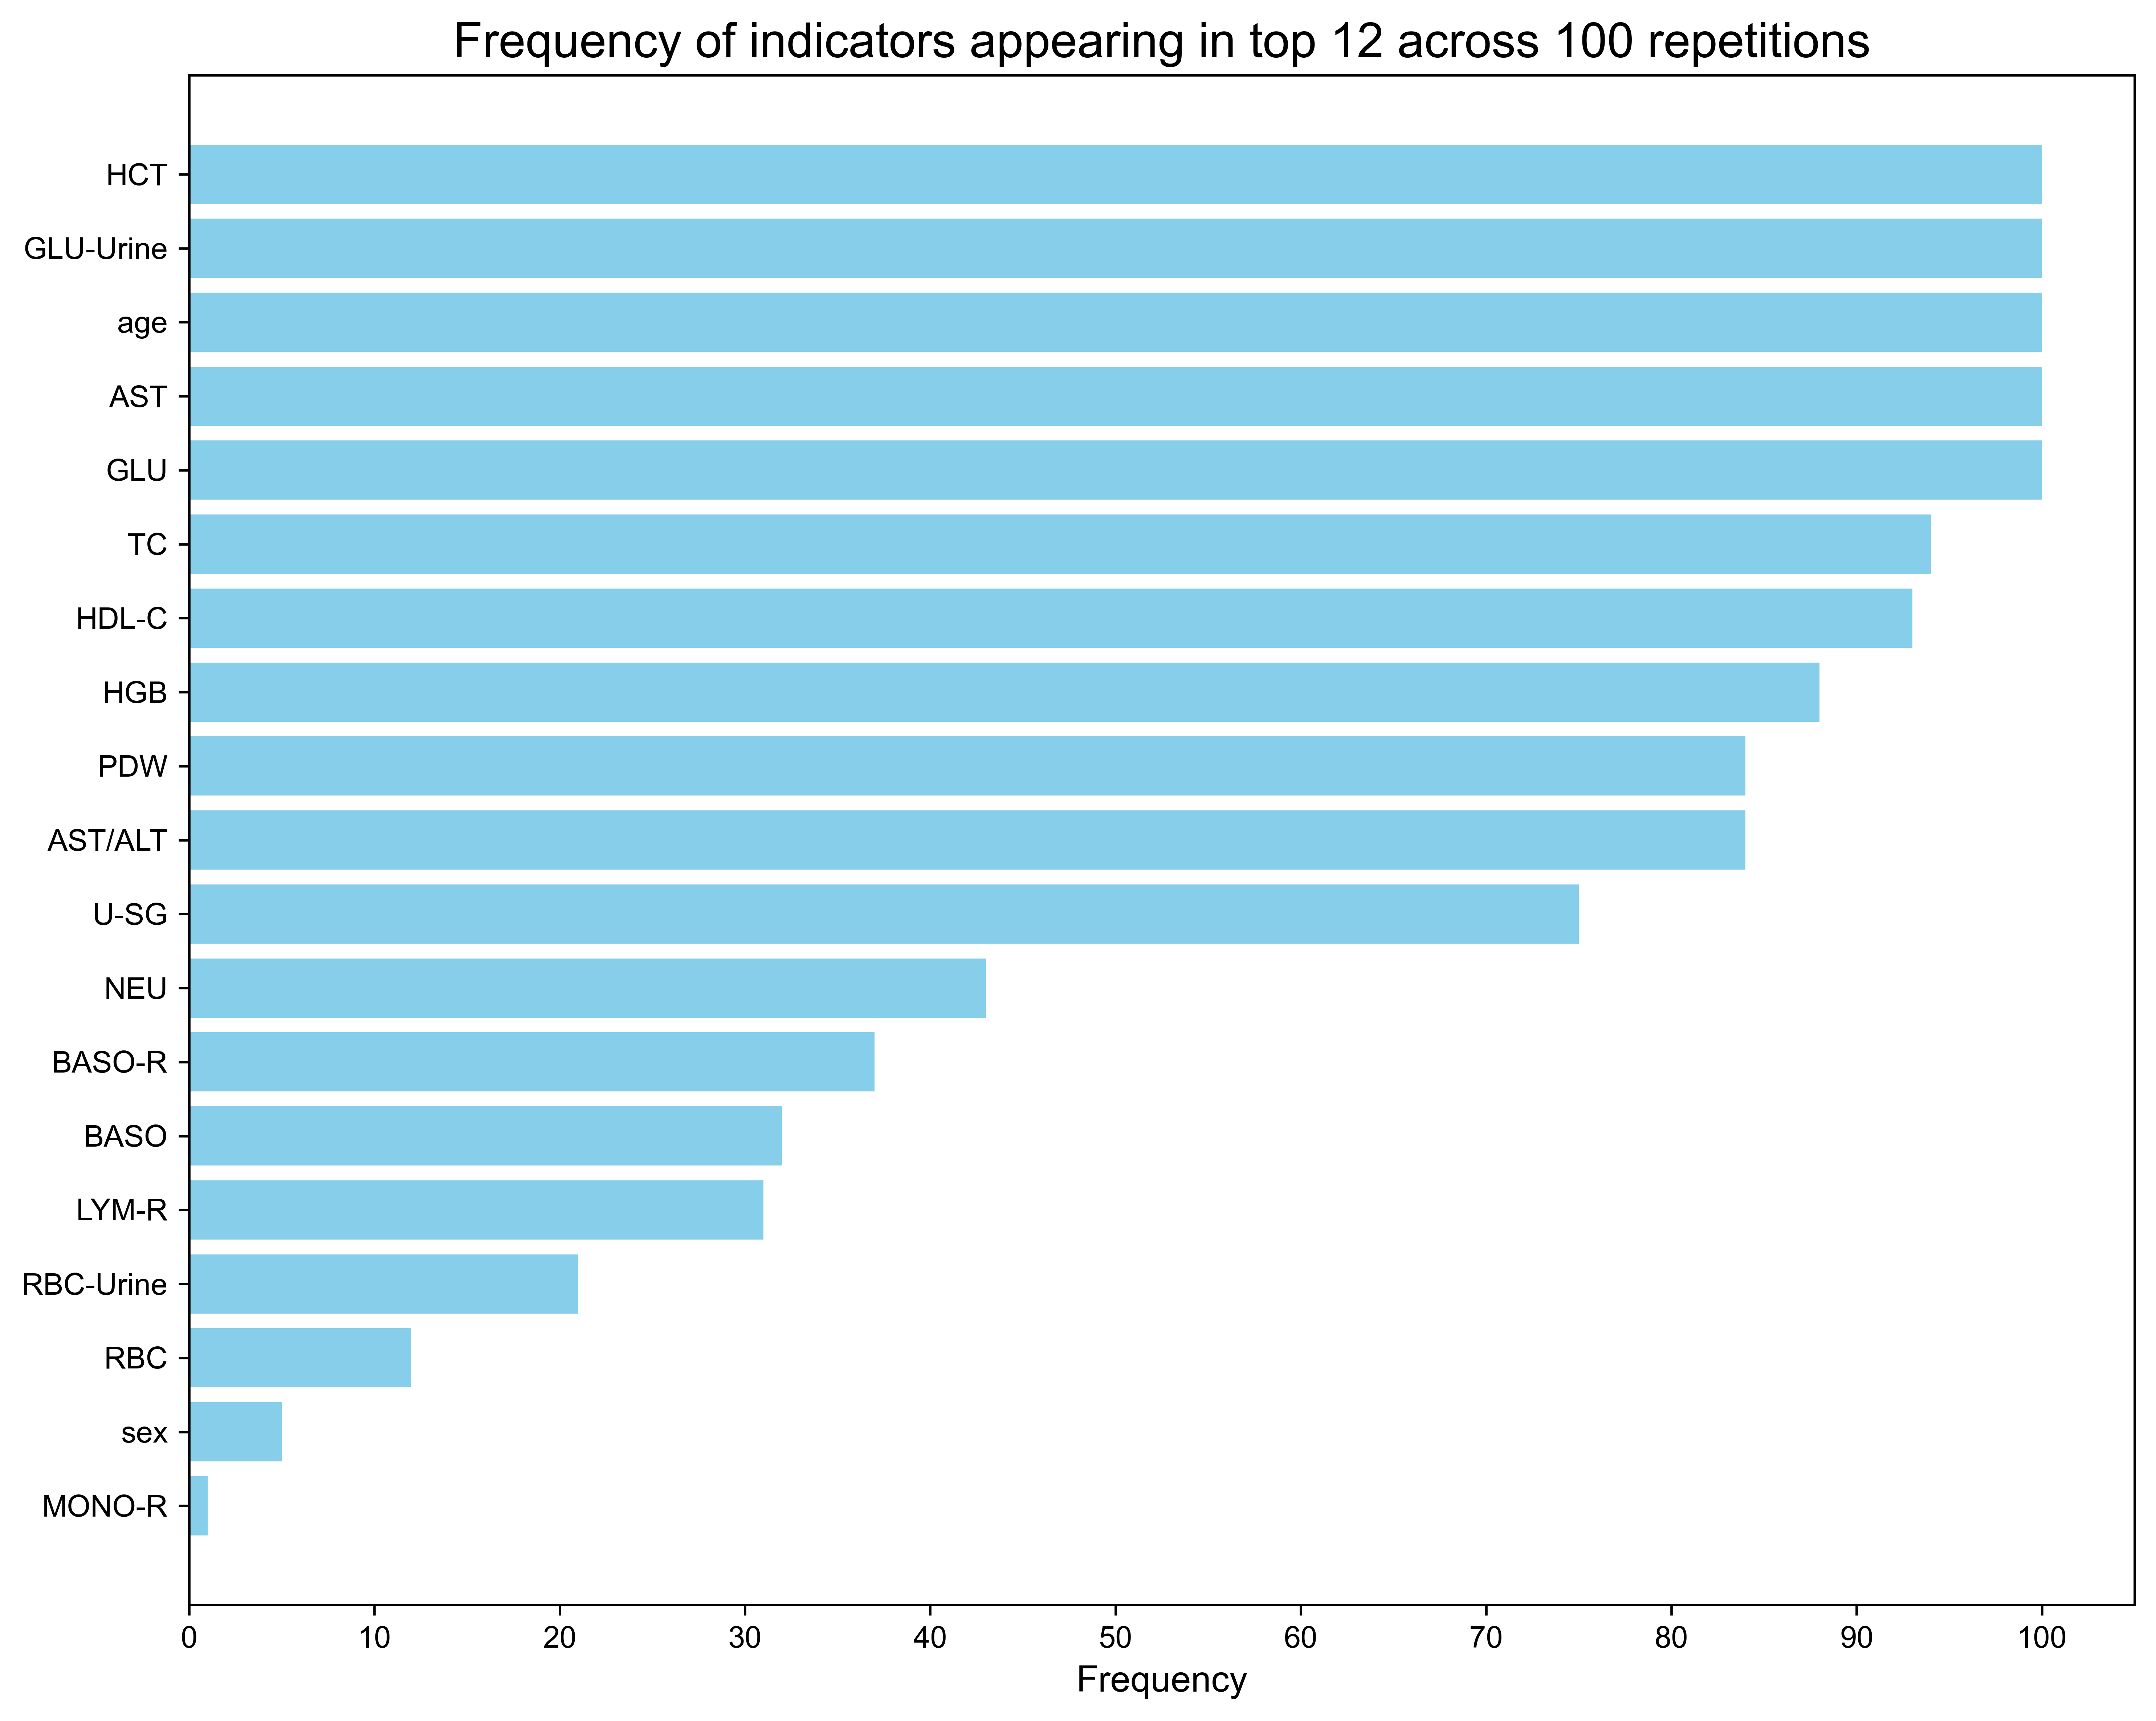

In [8]:
# Unpacking the tuples into separate lists
features, values = zip(*sorted_element_count)
# Creating the horizontal bar chart
plt.figure(figsize=(10, 8),dpi=600)
plt.barh(features[::-1], values[::-1], color='skyblue')
plt.xticks(range(0,101,10))
plt.xlabel('Frequency',fontsize = 12)
plt.title('Frequency of indicators appearing in top 12 across 100 repetitions',fontsize = 16)
plt.tight_layout()
# Display the plot
plt.show()